In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fastai.vision.all import *
from ipywidgets import widgets
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# ma'lumotlarni yuklab olish
import kagglehub

# Download latest version
path1 = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path1)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
fls =  get_image_files(path1)
fls

(#11712) [Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg'),Path('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'),Path('/kaggle/in

In [ ]:
path_train = Path(f"{path1}/chest_xray/chest_xray/train")
path_test = Path(f"{path1}/chest_xray/chest_xray/test")
path_val = Path(f"{path1}/chest_xray/chest_xray/val")

In [ ]:
pneumonia = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
    item_tfms = Resize(224)
)

In [ ]:
dls = pneumonia.dataloaders(path_train)

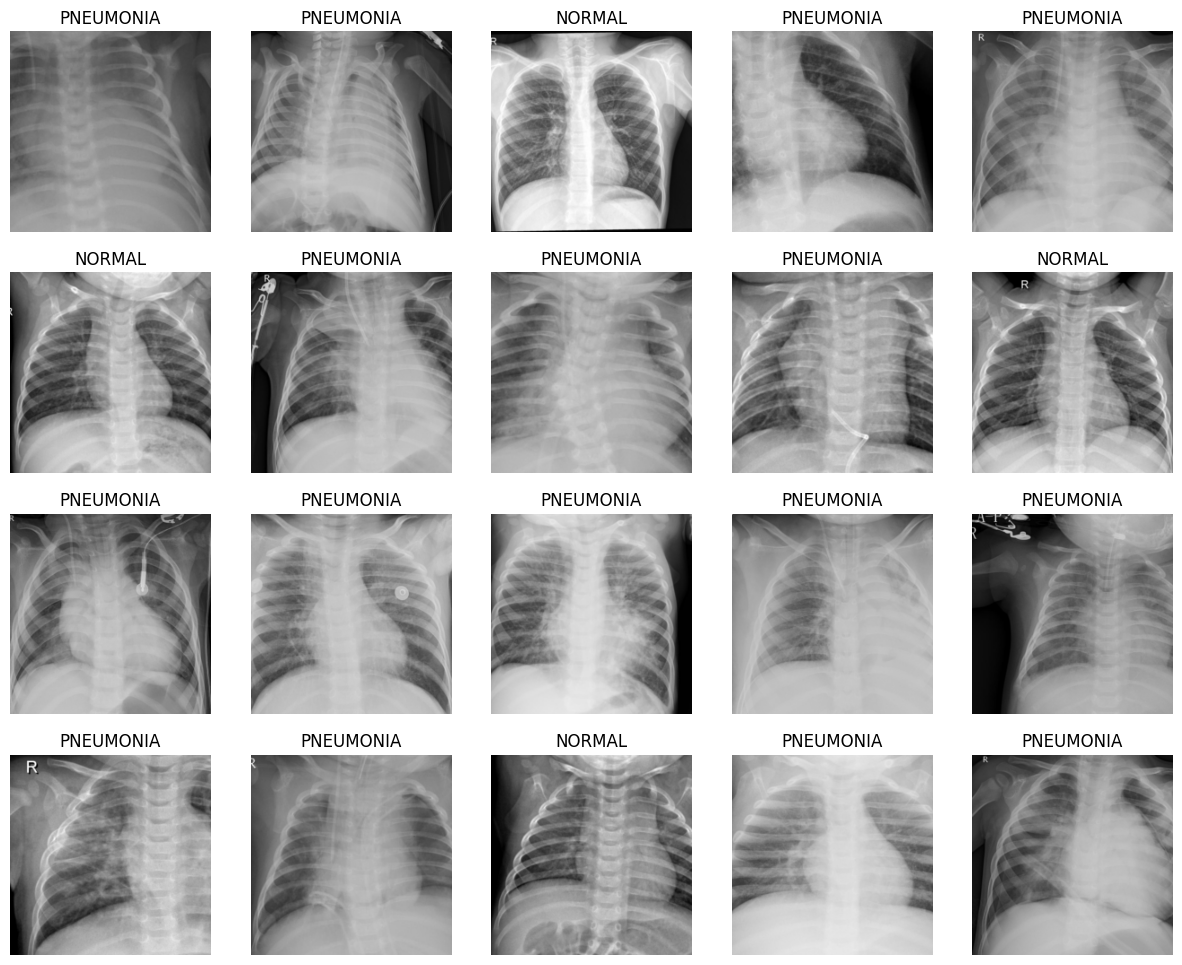

In [ ]:
dls.train.show_batch(max_n=20, nrows=4)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.521331,0.185037,0.940556,01:45


epoch,train_loss,valid_loss,accuracy,time
0,0.161327,0.096361,0.976031,01:39
1,0.096969,0.059186,0.982742,01:37
2,0.051596,0.053475,0.986577,01:36
3,0.031216,0.043950,0.987536,01:37


In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

In [ ]:
import IPython.display as ipd

It is a PNEUMONIA, accuracy: 100.0%


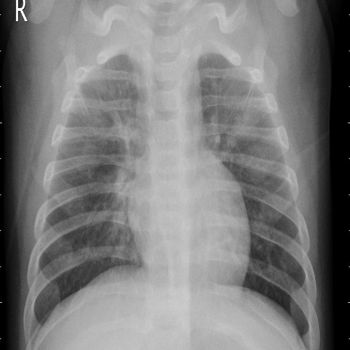

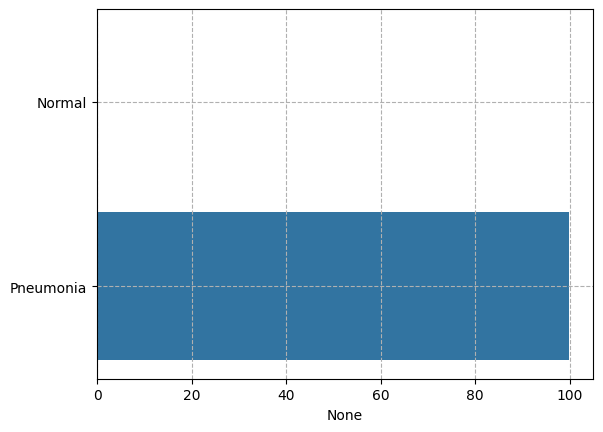

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print (f"It is a {pred}, accuracy: {probs[pred_id] * 100:.1f}%")
# img.resize((350,350))
ipd.display(img.resize((350,350)))

sns.barplot(x=probs * 100, y=["Normal", "Pneumonia"])
plt.grid(linestyle='--')
plt.show()

### Buyrakdagi toshlarni aniqlaydigon dastur

In [ ]:
# Download latest version
path = kagglehub.dataset_download("orvile/axial-ct-imaging-dataset-kidney-stone-detection")

print("Path to dataset files:", path)

100%|██████████| 3.78G/3.78G [00:49<00:00, 82.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/orvile/axial-ct-imaging-dataset-kidney-stone-detection/versions/2


In [ ]:
fls = get_image_files(path)[0]
fls

Path('/root/.cache/kagglehub/datasets/orvile/axial-ct-imaging-dataset-kidney-stone-detection/versions/2/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Kindy Stone Dataset/Original Dataset/Non-Stone/1516.jpg')

In [ ]:
augmented_path = Path(f"{path}/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Kindy Stone Dataset/Augmented Dataset")

In [ ]:
fls = get_image_files(augmented_path)
fls

(#35457) [Path('/root/.cache/kagglehub/datasets/orvile/axial-ct-imaging-dataset-kidney-stone-detection/versions/2/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Kindy Stone Dataset/Augmented Dataset/Non-Stone/17646.jpg'),Path('/root/.cache/kagglehub/datasets/orvile/axial-ct-imaging-dataset-kidney-stone-detection/versions/2/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Kindy Stone Dataset/Augmented Dataset/Non-Stone/13321.jpg'),Path('/root/.cache/kagglehub/datasets/orvile/axial-ct-imaging-dataset-kidney-stone-detection/versions/2/Axial CT Imaging Dataset for AI-Powered Kidney Stone Detection A Resource for Deep Learning Research/Axial CT Imaging Dataset for AI-Powered Kidney Stone 

In [ ]:
kidney_stone = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
    item_tfms = Resize(224)
)

In [ ]:
dls = kidney_stone.dataloaders(augmented_path)

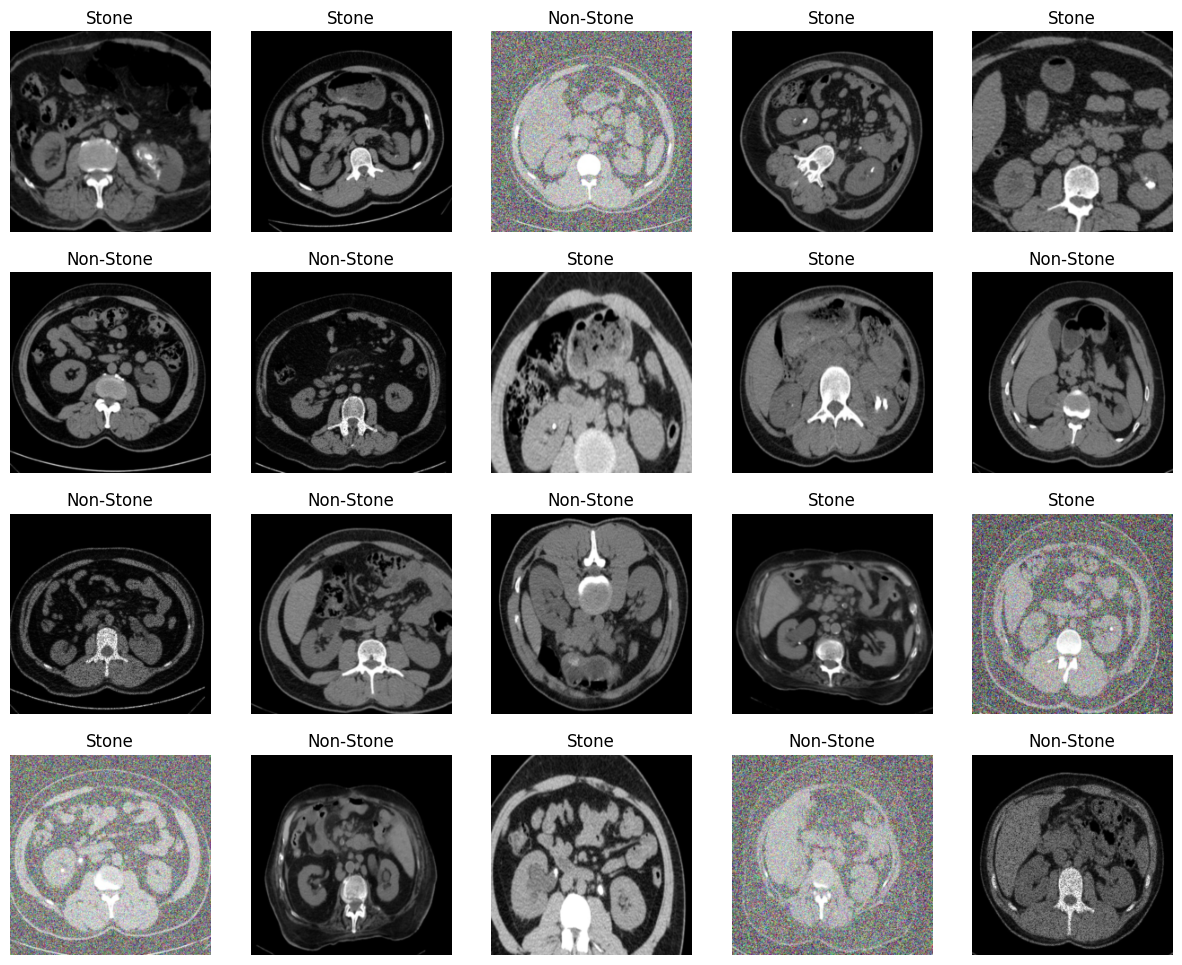

In [ ]:
dls.train.show_batch(max_n=20, nrows=4)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.439014,0.295251,0.873361,04:29


epoch,train_loss,valid_loss,accuracy,time
0,0.085265,0.048602,0.983500,04:23


epoch,train_loss,valid_loss,accuracy,time
0,0.085265,0.048602,0.983500,04:23
1,0.030426,0.021547,0.991680,04:13
2,0.007267,0.017482,0.993936,04:10


In [ ]:
learn.export("/content/kindey_stone.pkl")

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

It is a Stone, accuracy: 100.0%


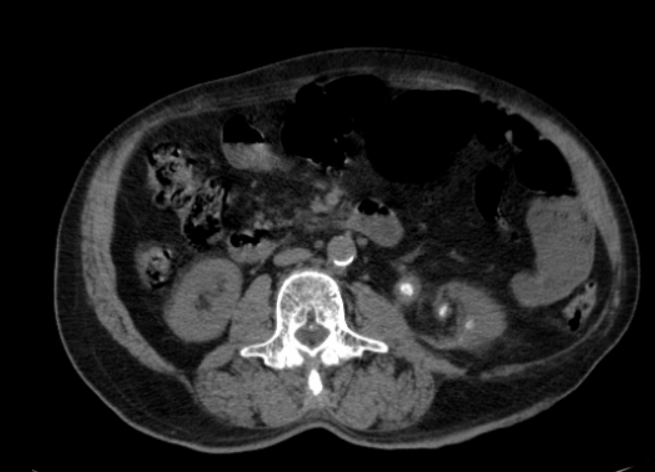

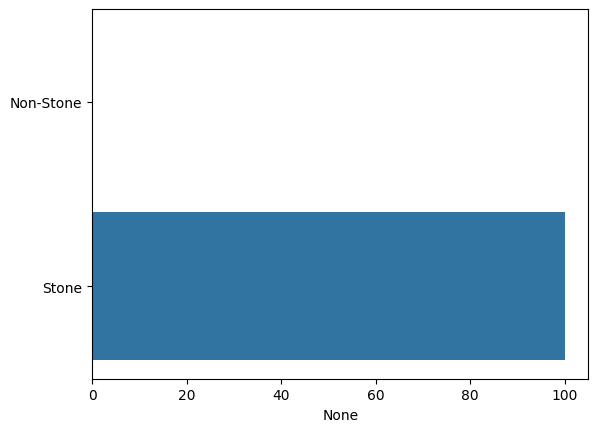

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"It is a {pred}, accuracy: {probs[pred_id] * 100:.1f}%")
ipd.display(img)

sns.barplot(x=probs * 100, y = ["Non-Stone", "Stone"])
plt.show()